# Double Auction Algorithm

lets first make a buyer and seller table

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
sns.set_style('darkgrid')

In [4]:
buyer=pd.DataFrame(columns=['seller','item','mc'])
seller=pd.DataFrame(columns=['buyer','item','mb'])

In [5]:
buyer_record={'buyer':['bA','bA','bA','bA','bA',
                       'bB','bB','bB','bB','bB',
                       'bC','bC','bC','bC','bC',
                       'bD','bD','bD','bD','bD',
                       'bE','bE','bE','bE','bE',
                       'bF','bF','bF','bF','bF',
                       'bG','bG','bG','bG','bG',
                       'bH','bH','bH','bH','bH',
                       'bI','bI','bI','bI','bI',
                       'bJ','bJ','bJ','bJ','bJ'],
             'item':[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,],
             'MB':[25,20,15,10,5,24,19,14,9,4,23,18,13,8,3,22,17,12,7,2,21,16,11,6,1,25,20,15,10,5,24,19,14,9,4,23,18,13,8,3,22,17,12,7,2,21,16,11,6,1]}

In [6]:
buyer=pd.DataFrame(buyer_record,columns=['buyer','item','MB'])

In [7]:
buyer

,buyer,item,MB
0,bA,1,25
1,bA,2,20
2,bA,3,15
3,bA,4,10
4,bA,5,5
5,bB,1,24
6,bB,2,19
7,bB,3,14
8,bB,4,9
9,bB,5,4


In [8]:
seller_record={'seller':['bA','bA','bA','bA','bA',
                         'bB','bB','bB','bB','bB',
                         'bC','bC','bC','bC','bC',
                         'bD','bD','bD','bD','bD',
                         'bE','bE','bE','bE','bE',
                         'bF','bF','bF','bF','bF',
                         'bG','bG','bG','bG','bG',
                         'bH','bH','bH','bH','bH',
                         'bI','bI','bI','bI','bI',
                         'bJ','bJ','bJ','bJ','bJ'],
             'item':[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,],
             'MC':[5,10,15,20,25,4,9,14,19,24,3,8,13,18,23,2,7,12,17,22,1,6,11,16,21,5,10,15,20,25,4,9,14,19,24,3,8,13,18,23,2,7,12,17,22,1,6,11,16,21]}

In [9]:
seller=pd.DataFrame(seller_record,columns=['seller','item','MC'])

In [10]:
seller['seller']=seller.seller.str.replace('b','s')

In [11]:
#buyer.to_csv('buyer.csv',index=False)
#seller.to_csv('seller.csv',index=False)

In [12]:
seller

,seller,item,MC
0,sA,1,5
1,sA,2,10
2,sA,3,15
3,sA,4,20
4,sA,5,25
5,sB,1,4
6,sB,2,9
7,sB,3,14
8,sB,4,19
9,sB,5,24


In [29]:
supply=seller.groupby('MC').count().drop('seller',axis=1)
demand=buyer.groupby('MB').count().drop('buyer',axis=1)

In [31]:
supply=supply.cumsum()

In [35]:
demand=demand.sort_index(ascending=False).cumsum()

In [38]:
xval=np.arange(0,26,2)
yval=np.arange(0,52,4)

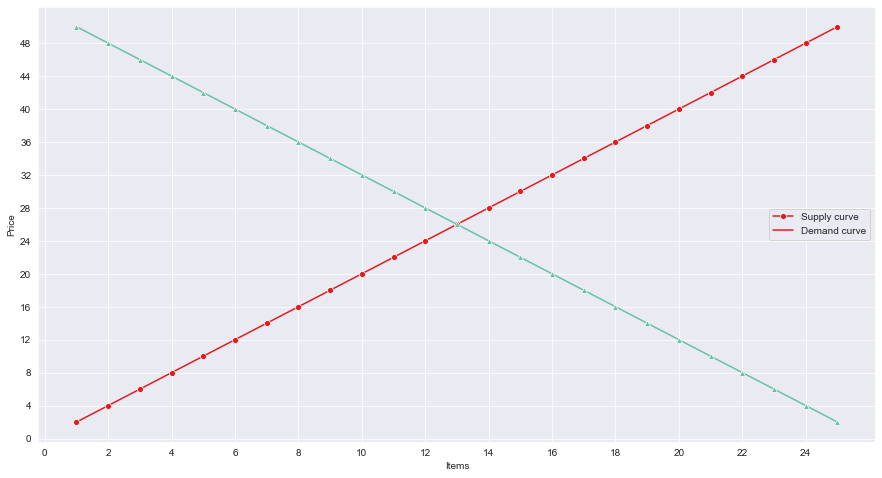

In [39]:
plt.figure(figsize=(15,8))
sns.lineplot(data=supply,marker='o',palette='Set1')
sns.lineplot(data=demand,marker='^',palette='Set2')
plt.ylabel('Price')
plt.xlabel('Items')
plt.legend(labels=['Supply curve','Demand curve'])
plt.xticks(ticks=xval)
plt.yticks(ticks=yval)
plt.show()

In [ ]:
a=seller[0:10]
b=seller[10:20]

In [ ]:
c=pd.DataFrame()

c=pd.concat([c,b],ignore_index=True)
c=pd.concat([c,a],ignore_index=True)
c

In [ ]:
help(pd)